# importing required libraries

In [4]:
import numpy as np
import tensorflow as tf

# getting corpus

In [5]:
corpus_raw = list()
sequences = ['MDDKFTTLPCELEDYPGSITCPHCSAQITTAVDHVVGKMSWVVCTAITLACLPCCCIPFLCNSTKDVRHTCPKCKQAVFVYKIL', 'MLVIFLGILGLLANQVSSQLVGQLHPTENPSENELEYWCTYMECCQFCWDCQNGLCVNKLGNTTILENEYVHPCIVSRWLNK']
for sequence in sequences:
    corpus_raw.append(' '.join(map(''.join, zip(*[iter(sequence)]*3))))
corpus_raw = ' . '.join(corpus_raw).lower()

In [6]:
corpus_raw

'mdd kft tlp cel edy pgs itc phc saq itt avd hvv gkm swv vct ait lac lpc cci pfl cns tkd vrh tcp kck qav fvy kil . mlv ifl gil gll anq vss qlv gql hpt enp sen ele ywc tym ecc qfc wdc qng lcv nkl gnt til ene yvh pci vsr wln'

# creating word index

In [7]:
words = []
for word in corpus_raw.split():
    if word != '.':
        words.append(word)
words = set(words)
word2int = {}
int2word = {}
vocab_size = len(words)
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# list the sentences as a list of words

In [8]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

# creating i/p o/p pairs

In [9]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [10]:
data

[['mdd', 'kft'],
 ['mdd', 'tlp'],
 ['kft', 'mdd'],
 ['kft', 'tlp'],
 ['kft', 'cel'],
 ['tlp', 'mdd'],
 ['tlp', 'kft'],
 ['tlp', 'cel'],
 ['tlp', 'edy'],
 ['cel', 'kft'],
 ['cel', 'tlp'],
 ['cel', 'edy'],
 ['cel', 'pgs'],
 ['edy', 'tlp'],
 ['edy', 'cel'],
 ['edy', 'pgs'],
 ['edy', 'itc'],
 ['pgs', 'cel'],
 ['pgs', 'edy'],
 ['pgs', 'itc'],
 ['pgs', 'phc'],
 ['itc', 'edy'],
 ['itc', 'pgs'],
 ['itc', 'phc'],
 ['itc', 'saq'],
 ['phc', 'pgs'],
 ['phc', 'itc'],
 ['phc', 'saq'],
 ['phc', 'itt'],
 ['saq', 'itc'],
 ['saq', 'phc'],
 ['saq', 'itt'],
 ['saq', 'avd'],
 ['itt', 'phc'],
 ['itt', 'saq'],
 ['itt', 'avd'],
 ['itt', 'hvv'],
 ['avd', 'saq'],
 ['avd', 'itt'],
 ['avd', 'hvv'],
 ['avd', 'gkm'],
 ['hvv', 'itt'],
 ['hvv', 'avd'],
 ['hvv', 'gkm'],
 ['hvv', 'swv'],
 ['gkm', 'avd'],
 ['gkm', 'hvv'],
 ['gkm', 'swv'],
 ['gkm', 'vct'],
 ['swv', 'hvv'],
 ['swv', 'gkm'],
 ['swv', 'vct'],
 ['swv', 'ait'],
 ['vct', 'gkm'],
 ['vct', 'swv'],
 ['vct', 'ait'],
 ['vct', 'lac'],
 ['ait', 'swv'],
 ['ait', 'vct'

# creating one hot encoding vectors

In [11]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] 
y_train = []
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print y_train

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


# fixing i/p o/p vector size through place holder

In [12]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

# fixing size of w1 (weight matrix) through place holder

In [13]:
EMBEDDING_DIM = 5
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1), b1)

# fixing size of the w2 (weight matrix) through place holder

In [14]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

# fixing output softmax function

In [15]:
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# loss function

In [16]:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# training

In [17]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
n_iters = 10000
for i in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print (sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))


7.87405
7.67633
7.5056
7.35603
7.2235
7.10498
6.99821
6.90141
6.81317
6.73236
6.65805
6.58946
6.52594
6.46692
6.41194
6.36058
6.31248
6.26733
6.22486
6.18483
6.14702
6.11125
6.07734
6.04515
6.01453
5.98537
5.95755
5.93097
5.90555
5.8812
5.85783
5.83539
5.81381
5.79303
5.77299
5.75365
5.73496
5.71687
5.69935
5.68236
5.66587
5.64985
5.63426
5.61909
5.6043
5.58987
5.57578
5.56201
5.54855
5.53537
5.52246
5.5098
5.49738
5.48519
5.47322
5.46145
5.44987
5.43848
5.42726
5.41621
5.40531
5.39457
5.38398
5.37352
5.36319
5.35299
5.34291
5.33295
5.32311
5.31337
5.30373
5.29419
5.28476
5.27541
5.26616
5.25699
5.24791
5.23891
5.23
5.22116
5.21239
5.2037
5.19509
5.18654
5.17806
5.16965
5.16131
5.15302
5.14481
5.13665
5.12855
5.12052
5.11254
5.10461
5.09675
5.08894
5.08118
5.07347
5.06582
5.05822
5.05067
5.04317
5.03572
5.02832
5.02096
5.01365
5.00639
4.99918
4.99201
4.98488
4.9778
4.97076
4.96377
4.95682
4.9499
4.94304
4.93621
4.92942
4.92267
4.91596
4.9093
4.90267
4.89607
4.88952
4.883
4.87652
4.8700

2.91428
2.91335
2.91242
2.91149
2.91056
2.90963
2.9087
2.90778
2.90685
2.90592
2.905
2.90407
2.90315
2.90222
2.9013
2.90037
2.89945
2.89853
2.89761
2.89669
2.89577
2.89485
2.89393
2.89301
2.89209
2.89117
2.89026
2.88934
2.88843
2.88751
2.8866
2.88568
2.88477
2.88386
2.88294
2.88203
2.88112
2.88021
2.8793
2.87839
2.87748
2.87657
2.87566
2.87476
2.87385
2.87294
2.87204
2.87113
2.87023
2.86932
2.86842
2.86752
2.86662
2.86571
2.86481
2.86391
2.86301
2.86211
2.86121
2.86032
2.85942
2.85852
2.85762
2.85673
2.85583
2.85494
2.85404
2.85315
2.85225
2.85136
2.85047
2.84958
2.84869
2.8478
2.84691
2.84602
2.84513
2.84424
2.84335
2.84246
2.84158
2.84069
2.83981
2.83892
2.83804
2.83715
2.83627
2.83539
2.8345
2.83362
2.83274
2.83186
2.83098
2.8301
2.82922
2.82834
2.82746
2.82659
2.82571
2.82483
2.82396
2.82308
2.82221
2.82133
2.82046
2.81959
2.81871
2.81784
2.81697
2.8161
2.81523
2.81436
2.81349
2.81262
2.81175
2.81089
2.81002
2.80915
2.80829
2.80742
2.80656
2.80569
2.80483
2.80397
2.8031
2.80224
2.8

2.19683
2.19634
2.19585
2.19536
2.19488
2.19439
2.19391
2.19342
2.19293
2.19245
2.19197
2.19148
2.191
2.19051
2.19003
2.18955
2.18906
2.18858
2.1881
2.18762
2.18713
2.18665
2.18617
2.18569
2.18521
2.18473
2.18425
2.18377
2.18329
2.18281
2.18233
2.18185
2.18138
2.1809
2.18042
2.17994
2.17947
2.17899
2.17851
2.17804
2.17756
2.17708
2.17661
2.17613
2.17566
2.17518
2.17471
2.17424
2.17376
2.17329
2.17282
2.17234
2.17187
2.1714
2.17093
2.17046
2.16998
2.16951
2.16904
2.16857
2.1681
2.16763
2.16716
2.16669
2.16622
2.16576
2.16529
2.16482
2.16435
2.16388
2.16342
2.16295
2.16248
2.16202
2.16155
2.16108
2.16062
2.16015
2.15969
2.15922
2.15876
2.1583
2.15783
2.15737
2.1569
2.15644
2.15598
2.15552
2.15506
2.15459
2.15413
2.15367
2.15321
2.15275
2.15229
2.15183
2.15137
2.15091
2.15045
2.14999
2.14953
2.14907
2.14861
2.14816
2.1477
2.14724
2.14679
2.14633
2.14587
2.14542
2.14496
2.1445
2.14405
2.14359
2.14314
2.14268
2.14223
2.14178
2.14132
2.14087
2.14042
2.13996
2.13951
2.13906
2.13861
2.13816
2.

1.82419
1.82394
1.8237
1.82346
1.82322
1.82298
1.82274
1.8225
1.82226
1.82203
1.82179
1.82155
1.82131
1.82107
1.82083
1.82059
1.82035
1.82012
1.81988
1.81964
1.8194
1.81917
1.81893
1.81869
1.81846
1.81822
1.81798
1.81775
1.81751
1.81728
1.81704
1.8168
1.81657
1.81633
1.8161
1.81586
1.81563
1.8154
1.81516
1.81493
1.81469
1.81446
1.81423
1.81399
1.81376
1.81353
1.81329
1.81306
1.81283
1.8126
1.81236
1.81213
1.8119
1.81167
1.81144
1.81121
1.81098
1.81074
1.81051
1.81028
1.81005
1.80982
1.80959
1.80936
1.80913
1.8089
1.80867
1.80844
1.80822
1.80799
1.80776
1.80753
1.8073
1.80707
1.80685
1.80662
1.80639
1.80616
1.80594
1.80571
1.80548
1.80525
1.80503
1.8048
1.80458
1.80435
1.80412
1.8039
1.80367
1.80345
1.80322
1.803
1.80277
1.80255
1.80232
1.8021
1.80187
1.80165
1.80143
1.8012
1.80098
1.80075
1.80053
1.80031
1.80009
1.79986
1.79964
1.79942
1.7992
1.79897
1.79875
1.79853
1.79831
1.79809
1.79787
1.79764
1.79742
1.7972
1.79698
1.79676
1.79654
1.79632
1.7961
1.79588
1.79566
1.79544
1.79522
1.7

1.64929
1.64917
1.64906
1.64895
1.64884
1.64873
1.64862
1.64851
1.64839
1.64828
1.64817
1.64806
1.64795
1.64784
1.64773
1.64762
1.64751
1.6474
1.64729
1.64718
1.64707
1.64696
1.64684
1.64673
1.64662
1.64651
1.6464
1.64629
1.64619
1.64608
1.64597
1.64586
1.64575
1.64564
1.64553
1.64542
1.64531
1.6452
1.64509
1.64498
1.64487
1.64476
1.64466
1.64455
1.64444
1.64433
1.64422
1.64411
1.644
1.6439
1.64379
1.64368
1.64357
1.64346
1.64336
1.64325
1.64314
1.64303
1.64293
1.64282
1.64271
1.6426
1.6425
1.64239
1.64228
1.64217
1.64207
1.64196
1.64185
1.64175
1.64164
1.64153
1.64143
1.64132
1.64121
1.64111
1.641
1.64089
1.64079
1.64068
1.64057
1.64047
1.64036
1.64026
1.64015
1.64004
1.63994
1.63983
1.63973
1.63962
1.63952
1.63941
1.63931
1.6392
1.6391
1.63899
1.63888
1.63878
1.63867
1.63857
1.63847
1.63836
1.63826
1.63815
1.63805
1.63794
1.63784
1.63773
1.63763
1.63752
1.63742
1.63732
1.63721
1.63711
1.637
1.6369
1.6368
1.63669
1.63659
1.63649
1.63638
1.63628
1.63618
1.63607
1.63597
1.63587
1.63576


1.55627
1.55621
1.55614
1.55608
1.55602
1.55596
1.5559
1.55583
1.55577
1.55571
1.55565
1.55559
1.55553
1.55546
1.5554
1.55534
1.55528
1.55522
1.55516
1.55509
1.55503
1.55497
1.55491
1.55485
1.55479
1.55473
1.55466
1.5546
1.55454
1.55448
1.55442
1.55436
1.5543
1.55423
1.55417
1.55411
1.55405
1.55399
1.55393
1.55387
1.55381
1.55375
1.55369
1.55362
1.55356
1.5535
1.55344
1.55338
1.55332
1.55326
1.5532
1.55314
1.55308
1.55302
1.55296
1.55289
1.55283
1.55277
1.55271
1.55265
1.55259
1.55253
1.55247
1.55241
1.55235
1.55229
1.55223
1.55217
1.55211
1.55205
1.55199
1.55193
1.55187
1.55181
1.55175
1.55169
1.55163
1.55157
1.55151
1.55145
1.55139
1.55133
1.55127
1.55121
1.55115
1.55109
1.55103
1.55097
1.55091
1.55085
1.55079
1.55073
1.55067
1.55061
1.55055
1.55049
1.55043
1.55037
1.55031
1.55025
1.55019
1.55013
1.55007
1.55002
1.54996
1.5499
1.54984
1.54978
1.54972
1.54966
1.5496
1.54954
1.54948
1.54942
1.54936
1.5493
1.54925
1.54919
1.54913
1.54907
1.54901
1.54895
1.54889
1.54883
1.54877
1.54872
1

1.50083
1.50079
1.50075
1.50071
1.50067
1.50063
1.5006
1.50056
1.50052
1.50048
1.50044
1.5004
1.50036
1.50033
1.50029
1.50025
1.50021
1.50017
1.50013
1.5001
1.50006
1.50002
1.49998
1.49994
1.49991
1.49987
1.49983
1.49979
1.49975
1.49971
1.49968
1.49964
1.4996
1.49956
1.49952
1.49949
1.49945
1.49941
1.49937
1.49933
1.4993
1.49926
1.49922
1.49918
1.49915
1.49911
1.49907
1.49903
1.49899
1.49896
1.49892
1.49888
1.49884
1.4988
1.49877
1.49873
1.49869
1.49865
1.49862
1.49858
1.49854
1.4985
1.49847
1.49843
1.49839
1.49835
1.49832
1.49828
1.49824
1.4982
1.49817
1.49813
1.49809
1.49805
1.49802
1.49798
1.49794
1.4979
1.49787
1.49783
1.49779
1.49775
1.49772
1.49768
1.49764
1.4976
1.49757
1.49753
1.49749
1.49746
1.49742
1.49738
1.49734
1.49731
1.49727
1.49723
1.4972
1.49716
1.49712
1.49708
1.49705
1.49701
1.49697
1.49694
1.4969
1.49686
1.49683
1.49679
1.49675
1.49671
1.49668
1.49664
1.4966
1.49657
1.49653
1.49649
1.49646
1.49642
1.49638
1.49635
1.49631
1.49627
1.49624
1.4962
1.49616
1.49613
1.4960

1.46739
1.46737
1.46734
1.46731
1.46728
1.46726
1.46723
1.4672
1.46718
1.46715
1.46712
1.46709
1.46707
1.46704
1.46701
1.46699
1.46696
1.46693
1.4669
1.46688
1.46685
1.46682
1.4668
1.46677
1.46674
1.46672
1.46669
1.46666
1.46663
1.46661
1.46658
1.46655
1.46653
1.4665
1.46647
1.46645
1.46642
1.46639
1.46636
1.46634
1.46631
1.46628
1.46626
1.46623
1.4662
1.46618
1.46615
1.46612
1.4661
1.46607
1.46604
1.46602
1.46599
1.46596
1.46593
1.46591
1.46588
1.46585
1.46583
1.4658
1.46577
1.46575
1.46572
1.46569
1.46567
1.46564
1.46561
1.46559
1.46556
1.46553
1.46551
1.46548
1.46545
1.46543
1.4654
1.46537
1.46535
1.46532
1.46529
1.46527
1.46524
1.46521
1.46519
1.46516
1.46513
1.46511
1.46508
1.46505
1.46503
1.465
1.46497
1.46495
1.46492
1.46489
1.46487
1.46484
1.46481
1.46479
1.46476
1.46474
1.46471
1.46468
1.46466
1.46463
1.4646
1.46458
1.46455
1.46452
1.4645
1.46447
1.46444
1.46442
1.46439
1.46436
1.46434
1.46431
1.46429
1.46426
1.46423
1.46421
1.46418
1.46415
1.46413
1.4641
1.46407
1.46405
1.464

1.4418
1.44177
1.44175
1.44173
1.44171
1.44169
1.44167
1.44164
1.44162
1.4416
1.44158
1.44156
1.44153
1.44151
1.44149
1.44147
1.44145
1.44143
1.4414
1.44138
1.44136
1.44134
1.44132
1.4413
1.44127
1.44125
1.44123
1.44121
1.44119
1.44116
1.44114
1.44112
1.4411
1.44108
1.44106
1.44104
1.44101
1.44099
1.44097
1.44095
1.44093
1.4409
1.44088
1.44086
1.44084
1.44082
1.4408
1.44078
1.44075
1.44073
1.44071
1.44069
1.44067
1.44065
1.44062
1.4406
1.44058
1.44056
1.44054
1.44052
1.44049
1.44047
1.44045
1.44043
1.44041
1.44039
1.44037
1.44034
1.44032
1.4403
1.44028
1.44026
1.44024
1.44021
1.44019
1.44017
1.44015
1.44013
1.44011
1.44009
1.44006
1.44004
1.44002
1.44
1.43998
1.43996
1.43994
1.43991
1.43989
1.43987
1.43985
1.43983
1.43981
1.43979
1.43976
1.43974
1.43972
1.4397
1.43968
1.43966
1.43964
1.43961
1.43959
1.43957
1.43955
1.43953
1.43951
1.43949
1.43946
1.43944
1.43942
1.4394
1.43938
1.43936
1.43934
1.43931
1.43929
1.43927
1.43925
1.43923
1.43921
1.43919
1.43917
1.43914
1.43912
1.4391
1.43908

1.42128
1.42126
1.42124
1.42123
1.42121
1.42119
1.42118
1.42116
1.42114
1.42113
1.42111
1.42109
1.42108
1.42106
1.42104
1.42103
1.42101
1.42099
1.42098
1.42096
1.42094
1.42093
1.42091
1.42089
1.42088
1.42086
1.42085
1.42083
1.42081
1.42079
1.42078
1.42076
1.42075
1.42073
1.42071
1.4207
1.42068
1.42066
1.42065
1.42063
1.42061
1.4206
1.42058
1.42056
1.42055
1.42053
1.42051
1.4205
1.42048
1.42046
1.42045
1.42043
1.42042
1.4204
1.42038
1.42037
1.42035
1.42033
1.42032
1.4203
1.42028
1.42027
1.42025
1.42023
1.42022
1.4202
1.42019
1.42017
1.42015
1.42014
1.42012
1.4201
1.42009
1.42007
1.42005
1.42004
1.42002
1.42001
1.41999
1.41997
1.41996
1.41994
1.41992
1.41991
1.41989
1.41987
1.41986
1.41984
1.41983
1.41981
1.41979
1.41978
1.41976
1.41974
1.41973
1.41971
1.4197
1.41968
1.41966
1.41965
1.41963
1.41961
1.4196
1.41958
1.41957
1.41955
1.41953
1.41952
1.4195
1.41949
1.41947
1.41945
1.41944
1.41942
1.4194
1.41939
1.41937
1.41936
1.41934
1.41932
1.41931
1.41929
1.41928
1.41926
1.41924
1.41923
1.4

# getting word vectors

In [19]:
vectors = sess.run(W1 + b1)
print(vectors[ word2int['kft'] ])

[ 1.51767516  1.09995544 -2.43238783  1.28615475 -1.26777959]


# finding closest words

In [20]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [21]:
print(int2word[find_closest(word2int['kft'], vectors)])

edy


# Visualization

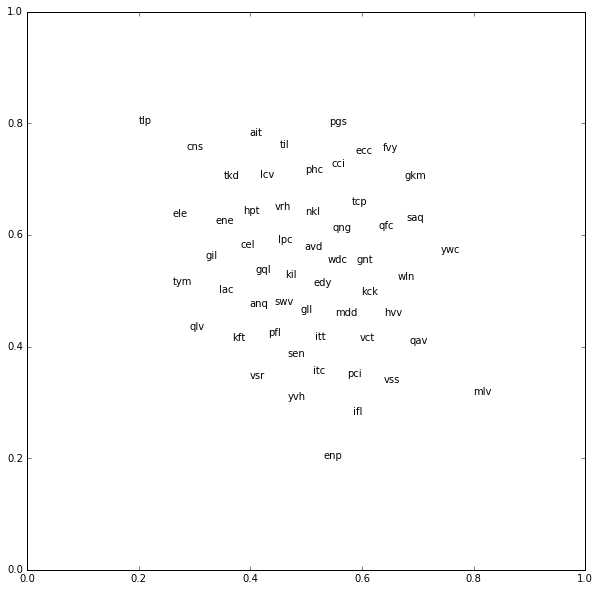

In [24]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.2, 0.8))
scaler.fit(vectors)
vectors = scaler.transform(vectors)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
for word in words:
    #print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1]))
plt.show()